In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [5]:
df["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.iloc[:,1:].apply(lambda x: print(x.unique()))

['Male' 'Female']
[19 35 26 27 32 25 20 18 29 47 45 46 48 49 31 21 28 33 30 23 24 22 59 34
 39 38 37 42 40 36 41 58 55 52 60 56 53 50 51 57 44 43 54]
[19000 20000 43000 57000 76000 58000 84000 150000 33000 65000 80000 52000
 86000 18000 82000 25000 26000 28000 29000 22000 49000 41000 23000 30000
 74000 137000 16000 44000 90000 27000 72000 31000 17000 51000 108000 15000
 79000 54000 135000 89000 32000 83000 55000 48000 117000 87000 66000
 120000 63000 68000 113000 112000 42000 88000 62000 118000 85000 81000
 50000 116000 123000 73000 37000 59000 149000 21000 35000 71000 61000
 75000 53000 107000 96000 45000 47000 100000 38000 69000 148000 115000
 34000 60000 70000 36000 39000 134000 101000 130000 114000 142000 78000
 143000 91000 144000 102000 126000 133000 147000 104000 146000 122000
 97000 95000 131000 77000 125000 106000 141000 93000 138000 119000 105000
 99000 129000 46000 64000 139000]
[0 1]


Gender             None
Age                None
EstimatedSalary    None
Purchased          None
dtype: object

In [9]:
del df["User ID"]

In [10]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [11]:
df["Gender"] = (df["Gender"].map({"Male":0 , "Female" : 1})) 

In [12]:
x = df.iloc[:,:3]
x.head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


In [13]:
y = df[["Purchased"]]
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [14]:
x.iloc[:,:]

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000
...,...,...,...
395,1,46,41000
396,0,51,23000
397,1,50,20000
398,0,36,33000


In [15]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'purchased')

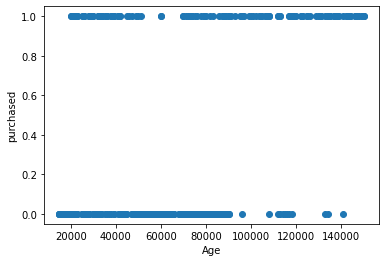

In [16]:
plt.scatter(x.iloc[:,2],y)
plt.xlabel("Age")
plt.ylabel("purchased")

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also Non

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(300, 3)
(300, 1)
(100, 3)
(100, 1)


In [20]:
model = DecisionTreeClassifier()

In [21]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
ans = model.score(x_train,y_train)
ans

0.9966666666666667

In [23]:
test = model.predict(x_test)
print(test[:10])
print(y_test[:10])

[0 0 1 1 0 0 0 1 0 1]
     Purchased
398          0
125          0
328          1
339          1
172          0
342          0
197          0
291          1
29           0
284          0


In [24]:
from sklearn import metrics 

In [25]:
metrics.accuracy_score(y_test,test)

0.81

In [26]:
metrics.confusion_matrix(y_test,test)

array([[48, 10],
       [ 9, 33]], dtype=int64)

In [27]:
metrics.f1_score(y_test,test,average="macro")

0.8056265984654731

In [28]:
metrics.precision_score(y_test,test,average="macro")

0.8047735618115055

In [29]:
metrics.recall_score(y_test,test,average="macro")

0.8066502463054187

In [30]:
print(metrics.classification_report(y_test,test))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        58
           1       0.77      0.79      0.78        42

    accuracy                           0.81       100
   macro avg       0.80      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



In [31]:
new_x_test = x_test

In [32]:
new_y_test = y_test

# Cross validation score

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
scores = cross_val_score(model,x,y, n_jobs=-1)   #n_jobs for This parameter is used to specify how many concurrent processes or threads should be used for routine
scores

array([0.75  , 0.8625, 0.825 , 0.775 , 0.7875])

In [35]:
scores.mean()

0.8

# Grid search method

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
new_model = DecisionTreeClassifier(max_depth=10,
                              min_samples_leaf=3,
                              min_samples_split=2)

In [38]:
new_model.fit(x_train,y_train)
new_model.score(x,y)

0.9225

In [39]:
param_grid = {
    'max_depth': list(range(5, 25)),
    'min_samples_split': list(range(4, 11)),
    'min_samples_leaf': list(range(4, 11))}
new_model = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=-1)
new_model.fit(x,y)
new_model.best_params_

{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 4}

In [40]:
new_model = DecisionTreeClassifier(max_depth=5,
                              min_samples_leaf=10,
                              min_samples_split=4)

In [41]:
new_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=4)

In [42]:
new_test = new_model.predict(new_x_test)

In [43]:
metrics.accuracy_score(y_test,new_test)

0.87

In [44]:
metrics.confusion_matrix(y_test,new_test)

array([[48, 10],
       [ 3, 39]], dtype=int64)

In [45]:
metrics.f1_score(y_test,new_test,average="macro")

0.8689384010484928

In [46]:
metrics.precision_score(y_test,new_test,average="macro")

0.868547418967587

In [47]:
metrics.recall_score(y_test,new_test,average="macro")

0.8780788177339902

In [48]:
print(metrics.classification_report(y_test,new_test))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        58
           1       0.80      0.93      0.86        42

    accuracy                           0.87       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.88      0.87      0.87       100

